# 实验: 用pytorch搭建神经网络，对生活中的时尚物品进行分类

## 作者

杨鹏 

github：(https://github.com/GZHU-YangPeng)<br>

## 数据集介绍

#### Fashion-MNIST数据集包含了10个类别的图像，分别是：t-shirt（T恤），trouser（牛仔裤），pullover（套衫），dress（裙子），coat（外套），sandal（凉鞋），shirt（衬衫），sneaker（运动鞋），bag（包），ankle boot（短靴）

### 数据集展示

![title](show1.jpeg)

![title](show2.jpeg)

![title](show3.jpeg)

### 导入所需要的包

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from Resnet_fashion import*
from IPython import display
import time
import sys
import random
from torch.utils.data import Dataset      
from torch.utils.data import DataLoader
import torch.nn.functional as F    
import numpy as np
import torch.nn as nn
import torch.optim as optim
import os
from torch.autograd import Variable
import torchvision.datasets as dsets

### 准备数据集

In [2]:
mnist_train=torchvision.datasets.FashionMNIST(root='./',train=True,download=True,
                                  transform=transforms.ToTensor())
mnist_test=torchvision.datasets.FashionMNIST(root='./',train=False,download=True,
                                  transform=transforms.ToTensor())
print(type(mnist_train))
print(len(mnist_train),len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [3]:
def use_svg_display():
    display.set_matplotlib_formats('retina')

def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress','coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[i] for i in labels]

text_labels = ['t-shirt', 'trouser', 'pullover', 'dress','coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

### 图片展示

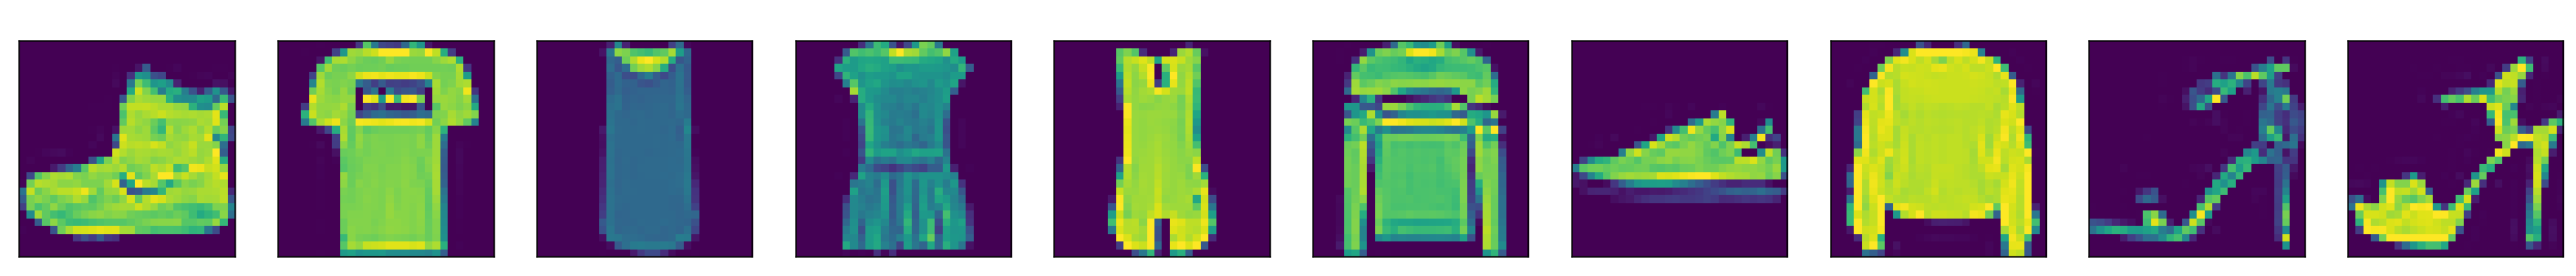

In [4]:
def show_fashion_mnist(images,labels):
    use_svg_display()

    _,figs=plt.subplots(1,len(images),figsize=(25,25))#
    for f,img,lbl in zip(figs,images,labels):
        f.imshow(img.view((28,28)).numpy())
        f.set_title(lbl,color='white')
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()
#查看训练数据集中部分图像内容与类别
x,y=[],[]
for i in range(10):
    x.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(x,get_fashion_mnist_labels(y))

### 加载数据

In [5]:
batch_size=128

trainloader=torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,
                                       num_workers=2)
testloader=torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False,
                                       num_workers=2)

### 定义网络

In [6]:
net = resnet34(10,True)
net = net.cuda()

### 定义损失函数和优化器

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.005,momentum = 0.9)

In [8]:
def train(epoch,net, dataloader):
    train_loss = 0
    net.train()
    
    for i,(datas,labels) in enumerate(dataloader):
        
        datas,labels = datas.to('cuda'), labels.to('cuda')
        
        optimizer.zero_grad()
        
        outputs = net(datas)
        

        loss = criterion(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item()
        
    train_loss /= len(dataloader)    
    return train_loss

In [9]:
def test(epoch,net, dataloader):
    test_loss = 0
    net.eval()
    
    for datas,labels in dataloader:
        
        datas,labels = datas.to('cuda'), labels.to('cuda')
        with torch.no_grad():     

            outputs  = net(datas)
            loss = criterion(outputs, labels)
            
            test_loss += loss.item()
        
    test_loss /= len(dataloader)
        
    return test_loss
        

### 训练过程

In [10]:
EPOCHS = 9
train_loss = []
test_loss = []
for epoch in range(EPOCHS):
    
    trn_loss = train(epoch, net ,trainloader)
    tst_loss = test(epoch, net ,testloader)
    train_loss.append(trn_loss)
    test_loss.append(tst_loss)
    print("Epoch : %d , Batch : %2d , train_loss : %.3f,test_loss : %.3f" %(epoch+1 , i+1 , trn_loss,tst_loss))
    
    if (i%1 ==0):

        correct = 0
        total = 0
        with torch.no_grad():
            for i,(datas,labels) in enumerate(testloader):

                datas,labels = datas.cuda(),labels.cuda()

                outputs = net(datas) # 输出为batch_size x 10    输出的10列都是数值,不是概率

                _,predicted = torch.max(outputs.data,dim=1) #_第一个是值的张量（概率），第二个是序号的张量

                #累计数据量
                total += labels.size(0)
                #比较有多少个预测正确
                correct+=(predicted == labels).sum()#相同为1，不同为0，利用sum()求总和
            print(",准确率: {:.3f}%".format(correct / total * 100))

Epoch : 1 , Batch : 10 , train_loss : 0.516,test_loss : 0.408
,准确率: 85.150%
Epoch : 2 , Batch : 79 , train_loss : 0.322,test_loss : 0.340
,准确率: 87.770%
Epoch : 3 , Batch : 79 , train_loss : 0.275,test_loss : 0.307
,准确率: 88.680%
Epoch : 4 , Batch : 79 , train_loss : 0.242,test_loss : 0.293
,准确率: 89.440%
Epoch : 5 , Batch : 79 , train_loss : 0.216,test_loss : 0.284
,准确率: 90.020%
Epoch : 6 , Batch : 79 , train_loss : 0.195,test_loss : 0.276
,准确率: 90.400%
Epoch : 7 , Batch : 79 , train_loss : 0.179,test_loss : 0.321
,准确率: 89.250%
Epoch : 8 , Batch : 79 , train_loss : 0.164,test_loss : 0.292
,准确率: 89.940%
Epoch : 9 , Batch : 79 , train_loss : 0.148,test_loss : 0.283
,准确率: 90.550%


### 验证模型效果

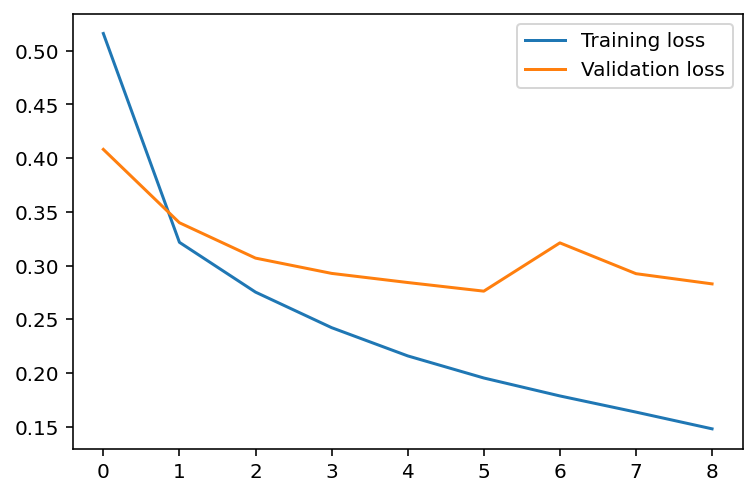

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Validation loss')
plt.legend()

### 准确率记录